### Import Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

import statsmodels.api as sm
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,roc_auc_score,RocCurveDisplay

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

background_color = "#F2F2F2"
color_palette = ["#7456A3","#08BEDF","#008DC3"]
sns.set_style("whitegrid" )
sns.set_theme(style="ticks")
sns.set_palette(color_palette)

C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('insurance_dataset_new.csv')
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [4]:
df.duplicated().sum()

679

In [5]:
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2951 entries, 0 to 2951
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2951 non-null   float64
 1   sex       2951 non-null   object 
 2   bmi       2951 non-null   float64
 3   smoker    2951 non-null   object 
 4   region    2951 non-null   object 
 5   children  2951 non-null   int64  
 6   charges   2951 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 184.4+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,2951.000000,2951.000000,2951.000000,2951.000000
mean,38.972994,30.614864,2.498814,12847.623458
std,12.191312,5.412875,1.711947,10762.255653
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.717292,1.000000,5701.034262
50%,39.296556,30.210000,3.000000,9523.978586
75%,48.559226,34.095907,4.000000,14831.372859
max,64.000000,53.130000,5.000000,63770.428010


### EDA

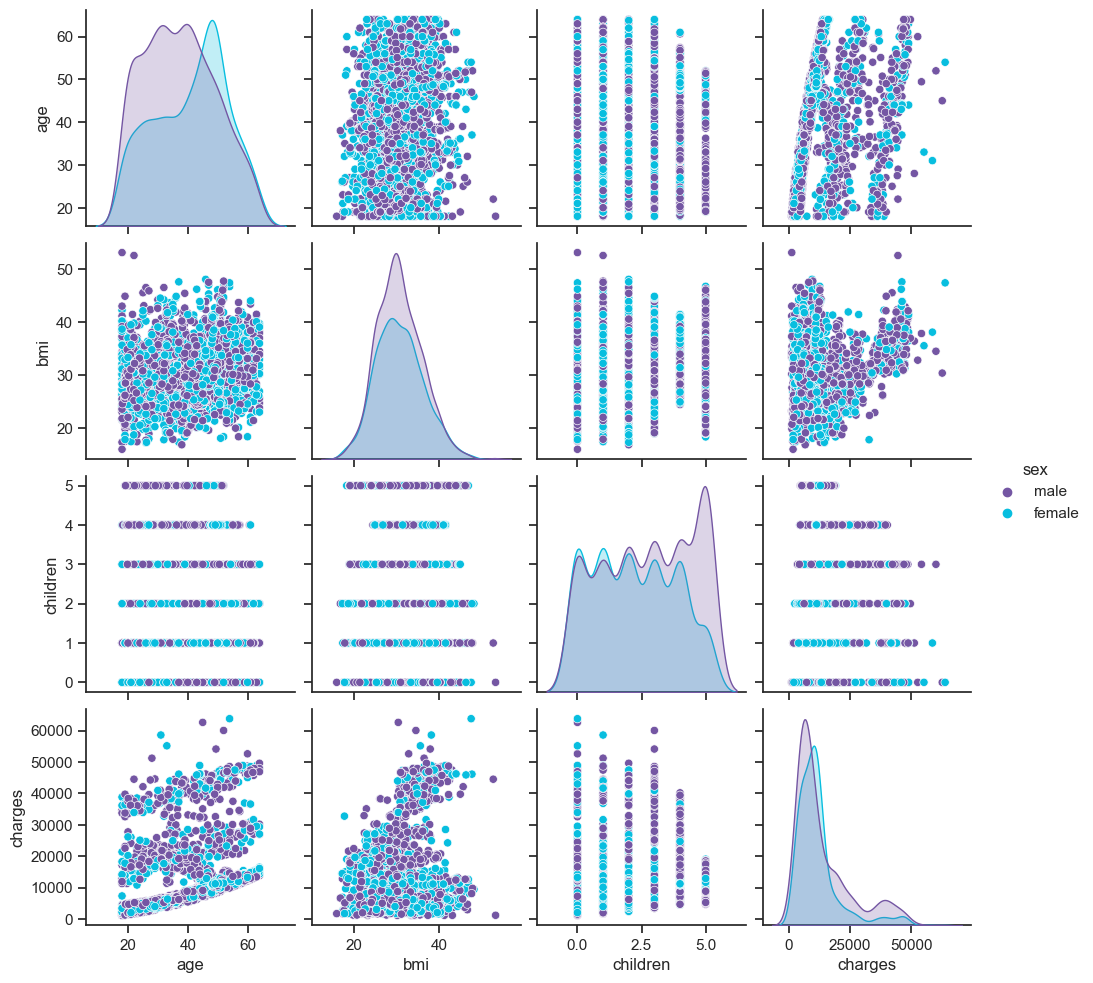

In [8]:
sns.pairplot(df,hue='sex')

In [9]:
def matrix_plot(df,title):

    sns.set(style="ticks")

    corr = df.corr()
    corr = np.round(corr, decimals=2)


    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(12, 8))
    #cmap = sns.diverging_palette(580, 10, as_cmap=True)
    cmap = sns.diverging_palette(180, 90, as_cmap=True) #Inna paleta barw

    sns.heatmap(corr, mask=mask, cmap=color_palette, vmax=0.3, center=0.03,annot=True,
                square=True, linewidths=.9, cbar_kws={"shrink": 0.8})
    plt.xticks(rotation=90)
    plt.title(title,fontsize=32,color='#0c343d',alpha=0.5)
    plt.show

C:\Users\user\AppData\Local\Temp\ipykernel_24072\2383789208.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


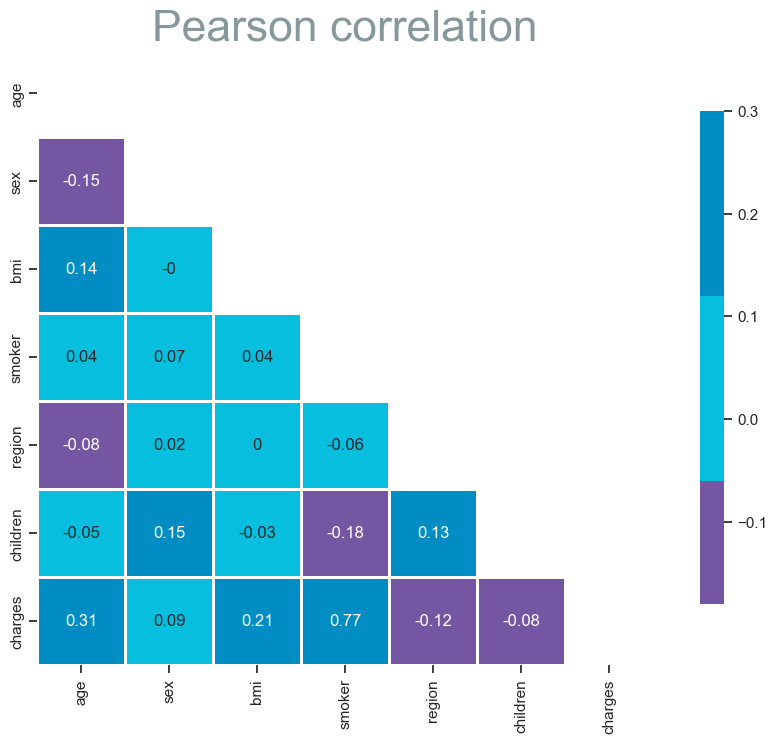

In [60]:
matrix_plot(df,'Pearson correlation')

In [11]:
df['sex'].value_counts()

male      1646
female    1305
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

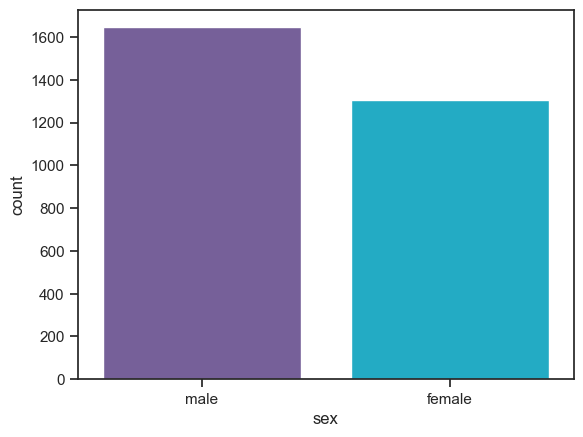

In [12]:
sns.countplot(df['sex'],palette=color_palette)

In [13]:
df['smoker'].value_counts()

no     2490
yes     461
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

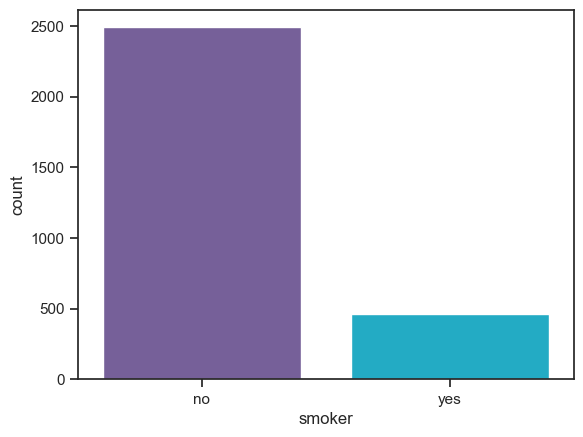

In [14]:
sns.countplot(df['smoker'],palette=color_palette)

In [15]:
df['region'].value_counts()

southeast    824
northwest    734
northeast    699
southwest    694
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

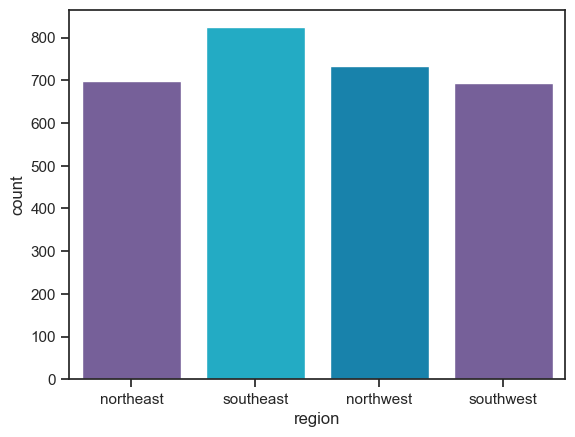

In [16]:
sns.countplot(df['region'],palette=color_palette)

In [17]:
df['children'].value_counts()

0    502
2    494
3    493
5    493
4    491
1    478
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

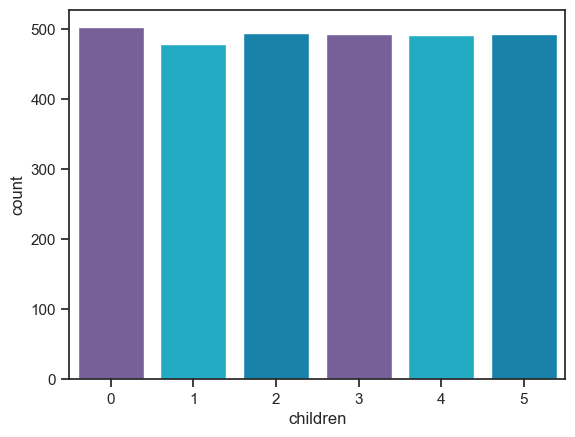

In [18]:
sns.countplot(df['children'],palette=color_palette)

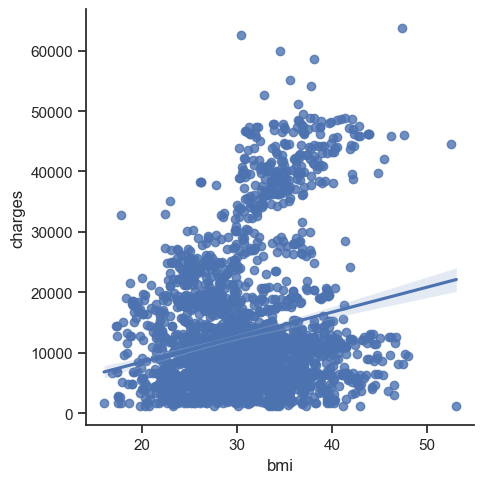

In [19]:
sns.lmplot(data=df,x='bmi',y='charges')

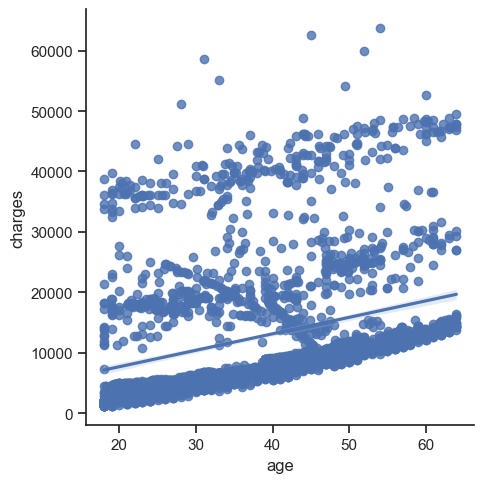

In [20]:
sns.lmplot(data=df,x='age',y='charges')

### Preprocessing 

In [21]:
df['age'] = df['age'].round(1)

In [22]:
df['bmi'] = df['bmi'].round(1)

In [23]:
df['sex'] = pd.get_dummies(df['sex'],drop_first=True)

In [24]:
df['smoker'] = pd.get_dummies(df['smoker'],drop_first=True)

In [25]:
df['region'].unique()

array(['northeast', 'southeast', 'northwest', 'southwest'], dtype=object)

In [26]:
pivot = pd.pivot_table(df, index = ["region"])
pivot

,age,bmi,charges,children,sex,smoker
region,,,,,,
northeast,38.605150,30.231330,15064.638386,2.251788,0.649499,0.195994
northwest,41.105177,30.769346,11973.359027,2.241144,0.407357,0.128065
southeast,39.970752,31.227670,13777.748714,2.691748,0.555825,0.186893
southwest,35.905764,30.109654,10434.933902,2.791066,0.626801,0.109510


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
enc = LabelEncoder()

In [29]:
df['region'] = enc.fit_transform(df['region'])

In [30]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,1,25.7,0,0,2,3279.868550
1,37.0,0,25.7,1,2,3,21454.494239
2,18.0,1,30.0,0,2,1,1720.353700
3,37.0,1,30.7,0,0,3,6801.437542
4,58.0,1,32.0,0,2,1,11946.625900


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
ms = MinMaxScaler()

In [33]:
x= df['charges'].values

In [34]:
df['charges'] = ms.fit_transform(x.reshape(-1,1))

In [35]:
#df.to_csv('insurance.csv')

In [36]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,1,25.7,0,0,2,0.034446
1,37.0,0,25.7,1,2,3,0.324551
2,18.0,1,30.0,0,2,1,0.009553
3,37.0,1,30.7,0,0,3,0.090658
4,58.0,1,32.0,0,2,1,0.172785


### Split the dataset

In [37]:
X = df.iloc[:,:-1].values
X

array([[21. ,  1. , 25.7,  0. ,  0. ,  2. ],
       [37. ,  0. , 25.7,  1. ,  2. ,  3. ],
       [18. ,  1. , 30. ,  0. ,  2. ,  1. ],
       ...,
       [50.4,  0. , 26.8,  0. ,  1. ,  4. ],
       [49.2,  0. , 31.4,  0. ,  1. ,  4. ],
       [49. ,  1. , 30.9,  1. ,  3. ,  0. ]])

In [38]:
y = df.iloc[:,-1]
y

0       0.034446
1       0.324551
2       0.009553
3       0.090658
4       0.172785
          ...   
2947    0.285202
2948    0.330164
2949    0.163355
2950    0.160643
2951    0.616227
Name: charges, Length: 2951, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [40]:
X_train

array([[23.4,  0. , 28.8,  0. ,  0. ,  2. ],
       [20. ,  1. , 30.3,  0. ,  3. ,  5. ],
       [19. ,  1. , 34.8,  1. ,  3. ,  0. ],
       ...,
       [46.6,  0. , 32.6,  0. ,  0. ,  1. ],
       [19. ,  1. , 25.6,  0. ,  1. ,  1. ],
       [39. ,  1. , 29.6,  0. ,  3. ,  4. ]])

### Modeling 

In [41]:
x_incl_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results
# results.params
# results.pvalues
pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

,coef,pvalue
const,-0.164271,0.0
x1,0.003830,0.0
x2,0.016663,0.0
x3,0.004324,0.0
x4,0.365055,0.0
x5,-0.011197,0.0
x6,0.008464,0.0


In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     973.7
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:53:29   Log-Likelihood:                 2258.8
No. Observations:                2360   AIC:                            -4504.
Df Residuals:                    2353   BIC:                            -4463.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1643      0.013    -12.755      0.000      -0.190      -0.139
x1             0.0038      0.000     23.568      0.000       0.004       0.004
x2             0.0167      0.004      4.187      0.000       0.009       0.024
x3             0.0043      0.000     12.048      0.000       0.004       0.005
x4             0.3651      0.005     67.311      0.000       0.354       0.376
x5            -0.0112      0.002     -6.290      0.000      -0.015      -0.008
x6             0.0085      0.001      7.239      0.000       0.006       0.011
==============================================================================
Omnibus:                      574.336   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1522.992
Skew:                           1.286   Prob(JB):                         0.00
Kurtosis:                       5.978   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Linear Regression:

In [43]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR = LR.fit(X_train, y_train)

print(LR.intercept_)
print(LR.coef_)

# Prediction:
y_pred = LR.predict(X_test)

# Scores:
print('r2 score: ',r2_score(y_test, y_pred))
print('mse: ',mean_squared_error(y_test, y_pred))
print('mae: ',mean_absolute_error(y_test, y_pred))

-0.1642705771441622
[ 0.00382951  0.01666289  0.00432447  0.36505457 -0.01119732  0.00846439]
r2 score:  0.7058323889431889
mse:  0.0079943992791208
mae:  0.060284400917199166


#### Randon Forest Regressor 

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import plot_roc_curve

In [48]:
param_grid = {'n_estimators': [100, 150, 200, 300, 400],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6],
              'min_samples_split':[1, 2, 3, 4, 5, 6],
              'max_depth':[1, 2, 3, 4, 5, 6]}
param_grid

{'n_estimators': [100, 150, 200, 300, 400],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6],
 'min_samples_split': [1, 2, 3, 4, 5, 6],
 'max_depth': [1, 2, 3, 4, 5, 6]}

In [49]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv = 5)

In [50]:
grid_search.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\job

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 300, 400]})

In [51]:
grid_search.score(X_test, y_test)

0.8637239004069437

In [52]:
grid_search.best_params_

{'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 200}

In [53]:
grid_search.best_score_

0.8706703978756988

In [54]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=6,
                      n_estimators=200)

In [55]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.060076,0.012419,0.000000,0.000000,1,1,1,100,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1080
1,0.086669,0.026021,0.000000,0.000000,1,1,1,150,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,918
2,0.109583,0.018843,0.000000,0.000000,1,1,1,200,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,917
3,0.212716,0.020611,0.000000,0.000000,1,1,1,300,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,916
4,0.284764,0.016222,0.000000,0.000000,1,1,1,400,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.260872,0.027179,0.011117,0.001614,6,6,6,100,"{'max_depth': 6, 'min_samples_leaf': 6, 'min_s...",0.870904,0.835753,0.866172,0.876200,0.890824,0.867971,0.018110,149
1076,0.372381,0.039941,0.020285,0.008211,6,6,6,150,"{'max_depth': 6, 'min_samples_leaf': 6, 'min_s...",0.868926,0.835040,0.866051,0.876446,0.894496,0.868192,0.019309,146
1077,0.517164,0.028764,0.027463,0.007731,6,6,6,200,"{'max_depth': 6, 'min_samples_leaf': 6, 'min_s...",0.869048,0.834219,0.868489,0.877348,0.894534,0.868727,0.019653,129
1078,0.838046,0.028480,0.045088,0.006562,6,6,6,300,"{'max_depth': 6, 'min_samples_leaf': 6, 'min_s...",0.869509,0.834756,0.868111,0.875972,0.894367,0.868543,0.019312,139


### Building the Model 

In [56]:
RFR = RandomForestRegressor(min_samples_leaf= 4, min_samples_split= 6, n_estimators= 200,max_depth=6)
RFR = RFR.fit(X_train, y_train)


# Prediction:
y_pred = RFR.predict(X_test)

# Scores:
print('r2 score: ',r2_score(y_test, y_pred))
print('mse: ',mean_squared_error(y_test, y_pred))
print('mae: ',mean_absolute_error(y_test, y_pred))

r2 score:  0.86424897040064
mse:  0.0036892162575962225
mae:  0.03059139543020896


In [57]:
RFR.feature_importances_

array([0.09637124, 0.00311806, 0.14924698, 0.67194642, 0.03202752,
       0.04728977])

In [58]:
std = np.std([RFR.feature_importances_ for tree in RFR.estimators_], axis=0)


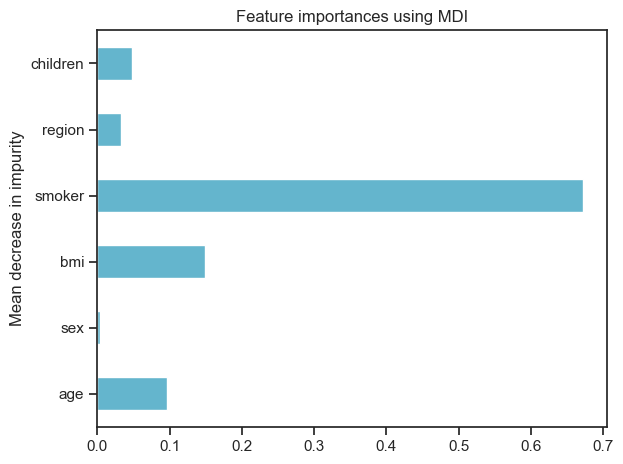

In [59]:
forest_importances = pd.Series(RFR.feature_importances_, index=df.columns[:-1])

fig, ax = plt.subplots()
indices = np.argsort(forest_importances)[::-1]
forest_importances.plot.barh(yerr=std, ax=ax,color='c')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Thanks 